Importing dependencies

In [1]:
import tradingeconomics as te
import time
import matplotlib.pyplot as plt
import configparser as cp
import os

Importing data

In [2]:
config_file = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..', 'tradingeconomics.cfg'))

cfg = cp.ConfigParser()
cfg.read(config_file)
key = cfg['API']['key']
te.login(key)

covid_deaths = te.getIndicatorData(country='all', indicators = 'coronavirus deaths', output_type='df')
time.sleep(1)

covid_cases = te.getIndicatorData(country='all', indicators = 'coronavirus cases', output_type='df')
time.sleep(1)

covid_recovered = te.getIndicatorData(country='all', indicators = 'coronavirus recovered', output_type='df')

Data manipulation

In [3]:
covid_deaths = covid_deaths[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Deaths (millions)'}).set_index('Country')
covid_cases = covid_cases[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Cases (millions)'}).set_index('Country')
covid_recovered = covid_recovered[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Recovered (millions)'}).set_index('Country')

covid_deaths['Deaths (millions)'] = covid_deaths['Deaths (millions)'].apply(lambda x: x/1000000)
covid_cases['Cases (millions)'] = covid_cases['Cases (millions)'].apply(lambda x: x/1000000)
covid_recovered['Recovered (millions)'] = covid_recovered['Recovered (millions)'].apply(lambda x: x/1000000)

df = covid_deaths.join(covid_cases, lsuffix='_covid_deaths', rsuffix='_covid_cases')
df = df.join(covid_recovered, lsuffix='_df', rsuffix='_covid_recovered')

df = df[['Recovered (millions)', 'Cases (millions)', 'Deaths (millions)']]

df.sort_values(['Cases (millions)', 'Deaths (millions)'], ascending=False, inplace=True)
df.drop('World', inplace=True)
df = df.head(10)
df

,Recovered (millions),Cases (millions),Deaths (millions)
Country,,,
United States,5.899718,14.139577,0.276325
India,9.016289,9.571559,0.139188
Brazil,5.725010,6.487084,0.175270
Russia,1.859851,2.402949,0.042176
France,0.166940,2.257331,0.054140
Spain,0.150376,1.675902,0.046038
United Kingdom,0.000344,1.674134,0.060113
Italy,0.846809,1.664829,0.058038
Argentina,1.274675,1.447732,0.039305


Plotting

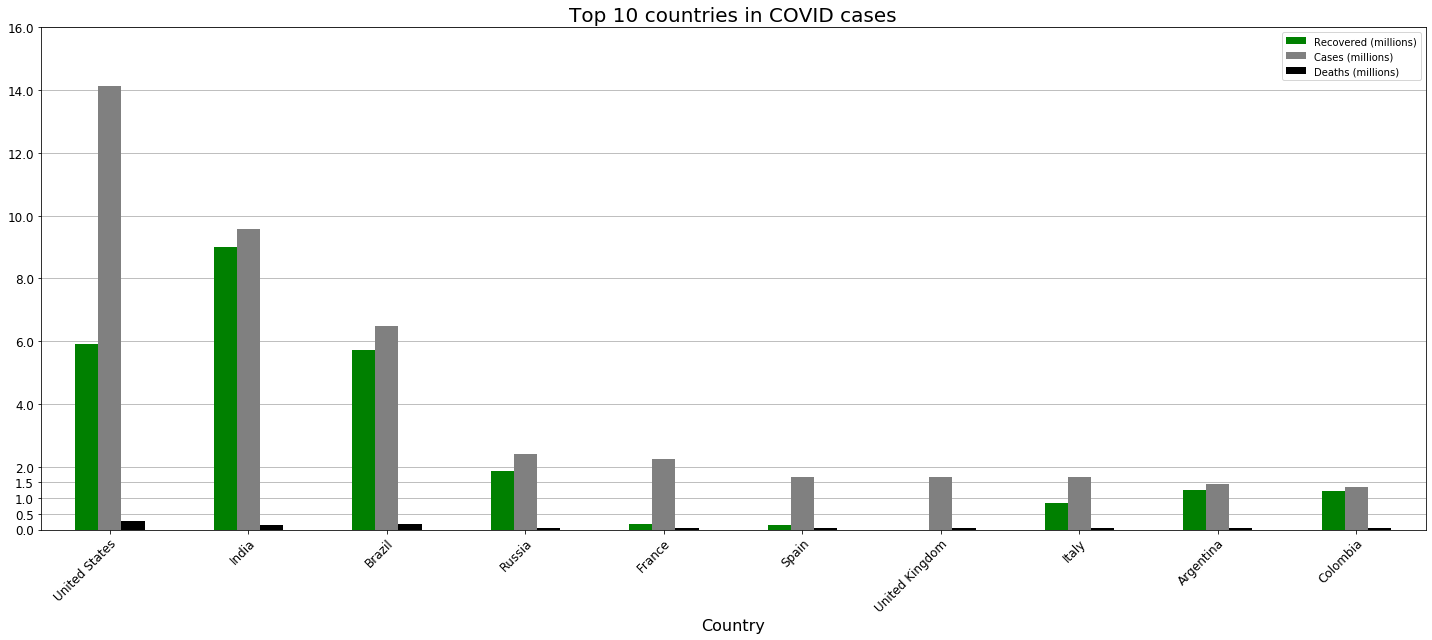

In [4]:
color_dict = {'Deaths (millions)': 'black', 'Cases (millions)': 'grey', 'Recovered (millions)': 'green'}

df.plot(
    figsize=(20, 9),
    kind='bar',
    zorder=3,
    color=[color_dict.get(x, '#333333') for x in df.columns],
    fontsize=12
)

ax = plt.gca()

plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)

plt.yticks(list(plt.yticks()[0]) + [0.5, 1, 1.5])
ax.yaxis.grid(zorder=0)
ax.set_title('Top 10 countries in COVID cases', color='black', size=20)
plt.xlabel('Country', fontsize=16)
plt.tight_layout()